In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression


In [4]:
MAIN_DATA = pd.read_csv('real_life_example_FOR_LIN_TASK.csv')
MAIN_DATA.head(n=10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [5]:
MAIN_DATA.shape

(4345, 9)

## PRE-PROCESSING

In [6]:
#DOING SOME DESCRIPTIVE STATISTICS

In [7]:
MAIN_DATA.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
#  a lot of information from model coudld be enginerred from 'Brand' , 'Year' e.t.c , that's why we can drop that column

In [9]:
DATA =  MAIN_DATA.drop(['Model'],axis = 1) # axis = 1 means column , axis = 0 means rows 
# drop function takes two argument column ehich we want to drop and axis 1 or 0.


In [10]:
DATA.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# dealing with missing values

In [11]:
data.isnull()

NameError: name 'data' is not defined

In [ ]:
DATA.isnull()

In [12]:
DATA.isnull().sum() #  we can see that we have in total 172 missing values in Price column  ,   and 150 missing values in EnginV column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
DATA_WITHOUT_MV = DATA.dropna(axis = 0)

In [14]:
DATA_WITHOUT_MV.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [15]:
DATA_WITHOUT_MV.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Important\AppData\Local\Temp\ipykernel_14040\1926453893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_WITHOUT_MV['Price'])


<Axes: xlabel='Price', ylabel='Density'>

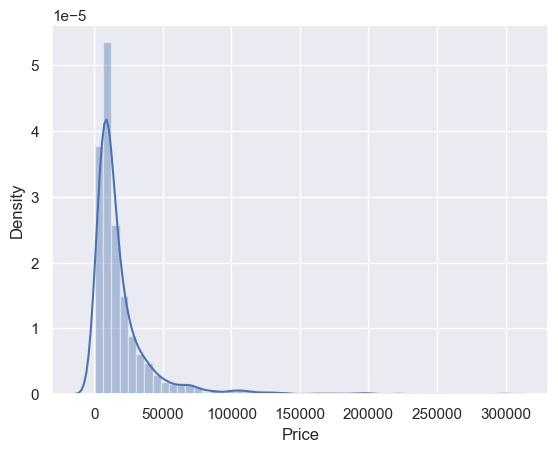

In [16]:
sns.distplot(DATA_WITHOUT_MV['Price'])

In [17]:
# we can notice from the plot and also from the table that mean price is almost 20000 $ min value is 600 $ , and 75 % of observations and below they are cost less than 21900 $ and max value is 300000$ smth went wrong , we have some outliers like cars which costs 300000$

In [18]:
    # кроме этого из за оутлайеров например линейные регресси могут дать не правильные коэфициенты потому что 300000 сильно завышено и линия будет стремится немного к этой цене
# да и в test data в нормальных данных предикшн будет не правильным 
# чтобы разобраться с этой проблемой нам нужно использовать метод 99% перцентиля - в этом методы мы выюираем число который покрывает остальные все 99% данных иными словами цена дома который больше 99% цен других домов 

In [19]:
Quantile_for_price = DATA_WITHOUT_MV['Price'].quantile(0.99)

In [20]:
Quantile_for_price

np.float64(129812.51999999981)

In [21]:
DATA_LAST = DATA_WITHOUT_MV[DATA_WITHOUT_MV['Price'] < Quantile_for_price]

In [22]:
DATA_LAST

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [23]:
DATA_LAST.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Important\AppData\Local\Temp\ipykernel_14040\4248279161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_LAST['Price'])


<Axes: xlabel='Price', ylabel='Density'>

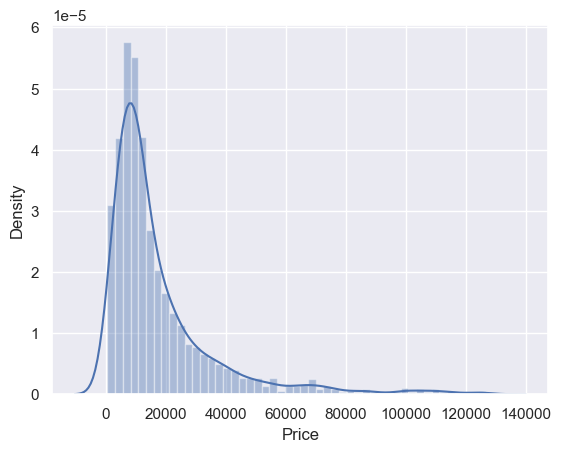

In [24]:
sns.distplot(DATA_LAST['Price'])

C:\Users\Important\AppData\Local\Temp\ipykernel_14040\4129030469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_LAST['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

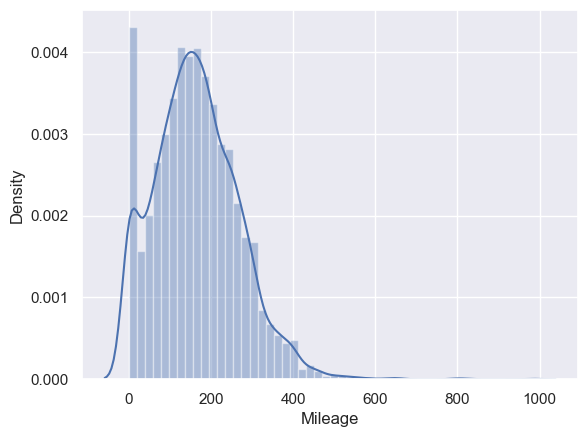

In [25]:
sns.distplot(DATA_LAST['Mileage'])

In [26]:
Quantile_for_mileage = DATA_LAST['Mileage'].quantile(0.99)

In [27]:
DATA_LAST_1 = DATA_LAST[DATA_LAST['Mileage']<Quantile_for_mileage]

In [28]:
DATA_LAST_1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


C:\Users\Important\AppData\Local\Temp\ipykernel_14040\114265364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_LAST_1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

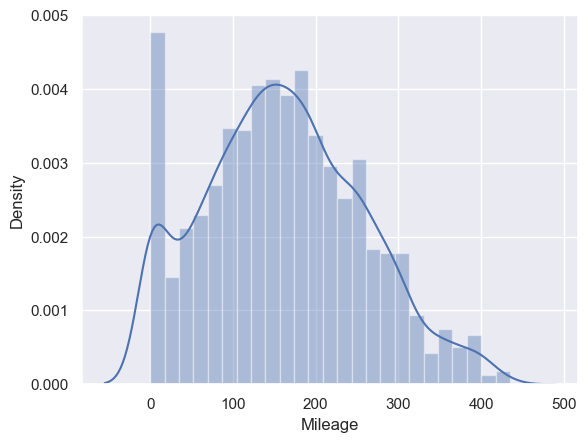

In [29]:
sns.distplot(DATA_LAST_1['Mileage'])

C:\Users\Important\AppData\Local\Temp\ipykernel_14040\2204852921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DATA_LAST_1['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

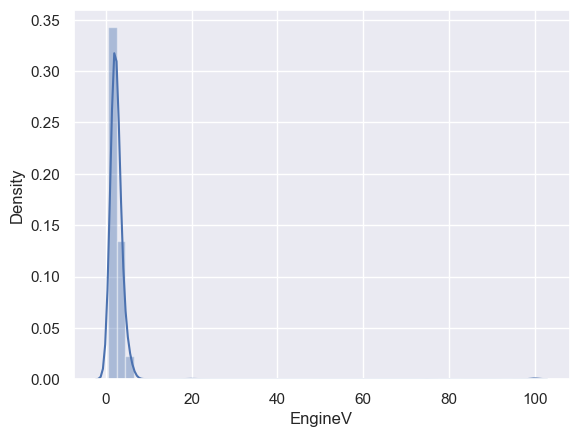

In [30]:
sns.distplot(DATA_LAST_1['EngineV'])

In [31]:
# standart engine volume is between 0.6 - 6.7 so that's why let's make like this 

In [32]:
DATA_LAST_LAST = DATA_LAST_1[DATA_LAST_1['EngineV'] < 6.7]

In [33]:
DATA_LAST_LAST

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [34]:
DATA_LAST_LAST.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [35]:
DATA_CLEANED  = DATA_LAST_LAST

In [36]:
DATA_CLEANED.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [37]:
DATA_CLEANED.head(n=100)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
106,Audi,39000.0,sedan,18,1.8,Other,yes,2015
107,Toyota,13500.0,crossover,150,4.7,Gas,yes,2002
108,Mitsubishi,6150.0,sedan,175,1.6,Petrol,yes,2007
109,BMW,45500.0,crossover,76,4.4,Petrol,yes,2010


In [38]:
DATA_CLEANED = DATA_LAST_LAST.reset_index(drop = True)

In [39]:
DATA_CLEANED.head(n=10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [40]:
DATA_CLEANED.shape

(3922, 8)

## Transforming DATA 

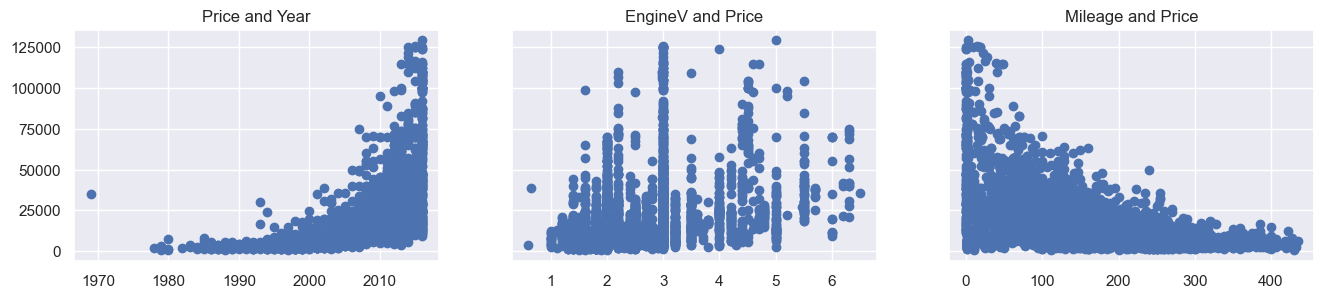

In [41]:
f , (ax1 , ax2, ax3) = plt.subplots(1, 3, sharey = True , figsize = (16,3))
ax1.scatter(DATA_CLEANED['Year'],DATA_CLEANED['Price'])
ax1.set_title('Price and Year')
ax2.scatter(DATA_CLEANED['EngineV'] , DATA_CLEANED['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(DATA_CLEANED['Mileage'],DATA_CLEANED['Price'])
ax3.set_title('Mileage and Price')

plt.show()

In [42]:
# WE HAVE TWO OPTIONS creating plots, first variant is when plt.scatter(x,y) ; plt.title('Price and Size') , second is OOP-method 
# we will do _, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
log_price = np.log(DATA_CLEANED['Price'])
DATA_CLEANED['Log_Price'] = log_price
DATA_CLEANED

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3917,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3918,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3919,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3920,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


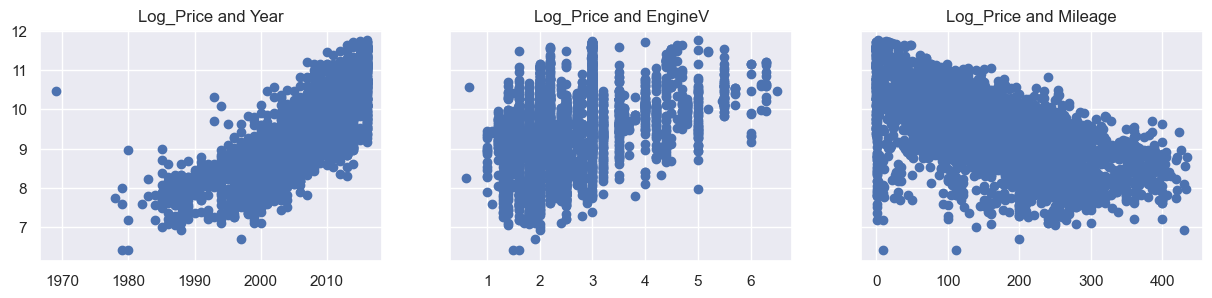

In [43]:
# let's re-draw the plot 
func, (ax1,ax2,ax3) = plt.subplots(1,3,sharey  = True , figsize = (15,3))
ax1.scatter(DATA_CLEANED['Year'],DATA_CLEANED['Log_Price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(DATA_CLEANED['EngineV'],DATA_CLEANED['Log_Price'])
ax2.set_title('Log_Price and EngineV')
ax3.scatter(DATA_CLEANED['Mileage'],DATA_CLEANED['Log_Price'])
ax3.set_title('Log_Price and Mileage')

plt.show()

In [44]:
#Let's drop the original Price column because we do not need it longer 

In [45]:
DATA_CLEANED = DATA_CLEANED.drop(['Price'],axis = 1)

In [46]:
DATA_CLEANED

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3917,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3918,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3919,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557
3920,BMW,sedan,194,2.0,Petrol,yes,1985,8.987197


In [47]:
#we can notice that we have year and Mileage has correlation because the newer the car the less mileage it will drive


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
variables = DATA_CLEANED[['Mileage','Year','EngineV']]
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
VIF['features'] = variables.columns

In [50]:
VIF

,VIF,features
0,3.791774,Mileage
1,10.374484,Year
2,7.647392,EngineV


In [51]:
# if VIF = 1 -> no multicolleniarity , if 1 < VIF < 5 perfectly okay , if VIF > 5 unacceptable

In [52]:
DATA_NO_MULTICOLLENIARITY = DATA_CLEANED.drop(['Year'],axis = 1)

In [53]:
variables

,Mileage,Year,EngineV
0,277,1991,2.0
1,427,1999,2.9
2,358,2003,5.0
3,240,2007,4.2
4,120,2011,2.0
...,...,...,...
3917,35,2014,1.6
3918,9,2014,3.0
3919,1,1999,3.5
3920,194,1985,2.0


In [54]:
variables.values

array([[2.770e+02, 1.991e+03, 2.000e+00],
       [4.270e+02, 1.999e+03, 2.900e+00],
       [3.580e+02, 2.003e+03, 5.000e+00],
       ...,
       [1.000e+00, 1.999e+03, 3.500e+00],
       [1.940e+02, 1.985e+03, 2.000e+00],
       [1.240e+02, 2.013e+03, 2.000e+00]])

In [55]:
variables.values.shape

(3922, 3)

In [56]:
variables.shape[0]

3922

In [57]:
VIF

,VIF,features
0,3.791774,Mileage
1,10.374484,Year
2,7.647392,EngineV


## Working with dummy variables

In [58]:
DATA_WITH_DUMMIES = pd.get_dummies(DATA_NO_MULTICOLLENIARITY,drop_first = True)

In [59]:
DATA_WITH_DUMMIES

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3918,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3919,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
3920,194,2.0,8.987197,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [60]:
DATA_WITH_DUMMIES.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [61]:
cols = ['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [64]:
data_preprocessed = DATA_WITH_DUMMIES

In [65]:
variables = data_preprocessed

In [66]:
VIF = pd.DataFrame()

In [67]:
bool_cols = variables.select_dtypes(include = 'bool').columns

In [68]:
variables[bool_cols] = variables[bool_cols].astype(int)

In [69]:
variables

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3918,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3919,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3920,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [70]:
VIF['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [71]:
VIF['FEATURES'] = variables.columns

In [72]:
VIF

,VIF,FEATURES
0,4.440745,Mileage
1,13.416000,EngineV
2,41.632891,Log_Price
3,2.586985,Brand_BMW
4,3.078739,Brand_Mercedes-Benz
5,1.819241,Brand_Mitsubishi
6,2.268208,Brand_Renault
7,2.393898,Brand_Toyota
8,3.303484,Brand_Volkswagen
9,1.610963,Body_hatch


In [73]:
# we can notice that VIF coefficietn for dependent variable (or output) Price is large enough , this is because output has linear relationship between predictors
# that's why we need to delete this column , because multicolleniarity analysis must be only for predictors for for output 

In [75]:
variables = data_preprocessed.drop(['Log_Price'], axis = 1)
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
VIF['FEATURES'] = variables.columns
VIF

,VIF,FEATURES
0,4.439634,Mileage
1,7.803624,EngineV
2,2.282415,Brand_BMW
3,2.871994,Brand_Mercedes-Benz
4,1.632936,Brand_Mitsubishi
5,2.079414,Brand_Renault
6,2.153245,Brand_Toyota
7,2.845970,Brand_Volkswagen
8,1.495239,Body_hatch
9,1.537954,Body_other


In [76]:
DATA_NO_MULTICOLLENIARITY

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3917,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3918,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3919,BMW,sedan,1,3.5,Petrol,yes,8.779557
3920,BMW,sedan,194,2.0,Petrol,yes,8.987197


In [79]:
DATA_WITH_DUMMIES_NEW = pd.get_dummies(DATA_NO_MULTICOLLENIARITY,drop_first = False)

In [80]:
DATA_WITH_DUMMIES.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [81]:
# if we have N cattegories we have to create N-1 dummy variables

## LINEAR REGRESSION

In [82]:
data_preprocessed['Log_Price']

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3917     9.792556
3918    11.736069
3919     8.779557
3920     8.987197
3921     9.510445
Name: Log_Price, Length: 3922, dtype: float64

In [83]:
outputs = data_preprocessed['Log_Price']
inputs = data_preprocessed.drop(['Log_Price'],axis = 1)

In [84]:
outputs

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3917     9.792556
3918    11.736069
3919     8.779557
3920     8.987197
3921     9.510445
Name: Log_Price, Length: 3922, dtype: float64

In [85]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3918,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3919,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3920,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## SCALING DATA

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
scaler.fit(inputs)

StandardScaler()

In [88]:
input_scaled = scaler.transform(inputs)

## TESTING DATA AND TRAINING DATA SPLITTING

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test , y_train , y_test = train_test_split(input_scaled,outputs,test_size = 0.2,random_state=365)

In [92]:
from sklearn.linear_model import LinearRegression

In [94]:
lin_regression = LinearRegression()
lin_regression.fit(x_train,y_train)

LinearRegression()

In [96]:
y_hat  = lin_regression.predict(x_train)

Text(0.5, 1.0, 'Comparing predictions with real output')

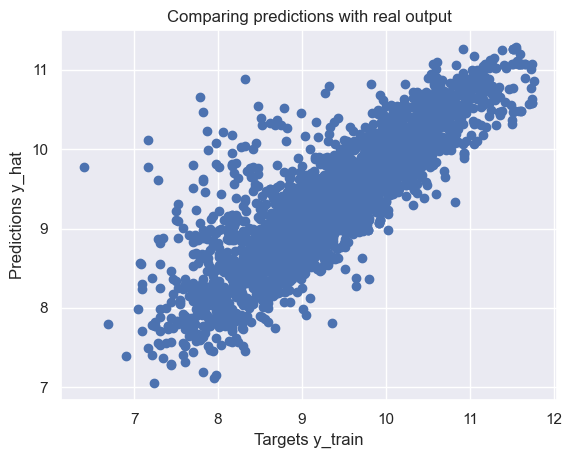

In [100]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets y_train')
plt.ylabel('Predictions y_hat')
plt.title('Comparing predictions with real output')

In [98]:
plt.show()

C:\Users\Important\AppData\Local\Temp\ipykernel_14040\1597819981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)


<Axes: xlabel='Log_Price', ylabel='Density'>

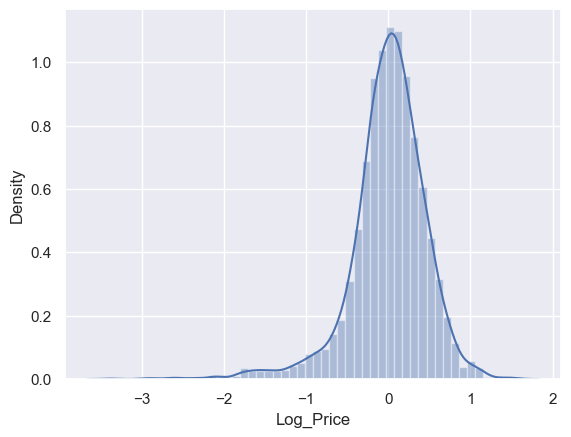

In [101]:
sns.distplot(y_train-y_hat)

In [102]:
# residual plot = plot of y_train  - y_prediction or error plot , this plot must be normally distrbuted

In [106]:
lin_regression.score(x_train,y_train) # relatively good

0.7249966874986589

In [107]:
lin_regression.intercept_

np.float64(9.393431307281903)

In [108]:
lin_regression.coef_

array([-0.46054919,  0.22557998,  0.03329935,  0.02151241, -0.11484523,
       -0.17224342, -0.04084886, -0.08174236, -0.15168614, -0.09866278,
       -0.19699486, -0.11384085, -0.14657493, -0.13284341, -0.03170193,
       -0.14995286,  0.30375311])

In [110]:
reg_summary  = pd.DataFrame(inputs.columns.values,columns = ['Features'])
reg_summary['Weights'] = lin_regression.coef_

In [111]:
reg_summary

,Features,Weights
0,Mileage,-0.460549
1,EngineV,0.225580
2,Brand_BMW,0.033299
3,Brand_Mercedes-Benz,0.021512
4,Brand_Mitsubishi,-0.114845
5,Brand_Renault,-0.172243
6,Brand_Toyota,-0.040849
7,Brand_Volkswagen,-0.081742
8,Body_hatch,-0.151686
9,Body_other,-0.098663


In [112]:
# we can notice that Mileage has negative coefficent means that higher the milleage lower will be price , but higher EngineVolume higher will be price

In [113]:
# but what about dummy variables , in this case Audi is benchmark and positive weights shows us that this brand is expensive than audi otherwise not

## Testing

In [114]:
y_hat_test = lin_regression.predict(x_test)

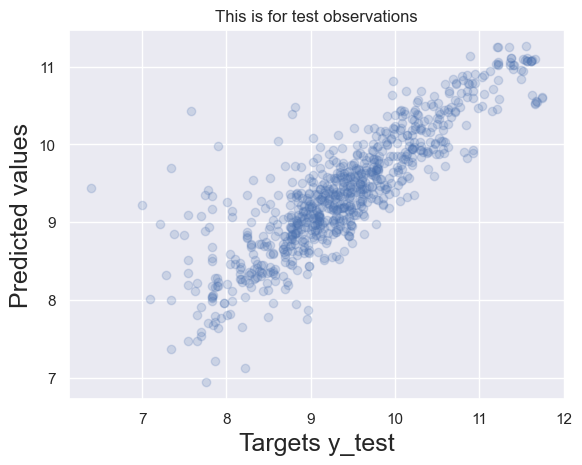

In [116]:
plt.scatter(y_test, y_hat_test,alpha = 0.2)
plt.xlabel('Targets y_test',size = 18)
plt.ylabel('Predicted values', size = 18)
plt.title('This is for test observations')
plt.show()

In [118]:
data_performance = pd.DataFrame(np.exp(y_hat_test),columns = ['Prediction'])
data_performance

,Prediction
0,8167.162062
1,17096.839470
2,6138.314541
3,4244.771738
4,5577.752364
...,...
780,36868.172171
781,5469.343782
782,11164.901071
783,8834.529506


In [119]:
data_performance['Targets'] = np.exp(y_test)

In [120]:
data_performance

,Prediction,Targets
0,8167.162062,NaN
1,17096.839470,7900.0
2,6138.314541,NaN
3,4244.771738,NaN
4,5577.752364,NaN
...,...,...
780,36868.172171,NaN
781,5469.343782,NaN
782,11164.901071,NaN
783,8834.529506,NaN


In [121]:
y_test

1437     8.942461
3233     9.210240
3780     8.389360
2628     7.549609
299      8.779557
          ...    
3200    10.425713
819      8.922658
1677     9.487972
1469     9.296518
3562     9.071078
Name: Log_Price, Length: 785, dtype: float64

In [122]:
y_test = y_test.reset_index(drop = True)

In [123]:
y_test

0       8.942461
1       9.210240
2       8.389360
3       7.549609
4       8.779557
         ...    
780    10.425713
781     8.922658
782     9.487972
783     9.296518
784     9.071078
Name: Log_Price, Length: 785, dtype: float64

In [124]:
data_performance['Targets'] = np.exp(y_test)

In [125]:
data_performance

,Prediction,Targets
0,8167.162062,7650.0
1,17096.839470,9999.0
2,6138.314541,4400.0
3,4244.771738,1900.0
4,5577.752364,6500.0
...,...,...
780,36868.172171,33715.5
781,5469.343782,7500.0
782,11164.901071,13200.0
783,8834.529506,10900.0


In [126]:
data_performance['Residual'] = data_performance['Targets'] - data_performance['Prediction']

In [127]:
data_performance

,Prediction,Targets,Residual
0,8167.162062,7650.0,-517.162062
1,17096.839470,9999.0,-7097.839470
2,6138.314541,4400.0,-1738.314541
3,4244.771738,1900.0,-2344.771738
4,5577.752364,6500.0,922.247636
...,...,...,...
780,36868.172171,33715.5,-3152.672171
781,5469.343782,7500.0,2030.656218
782,11164.901071,13200.0,2035.098929
783,8834.529506,10900.0,2065.470494


In [131]:
data_performance['Difference%'] = np.absolute((data_performance['Residual']/data_performance['Targets']*100))

In [132]:
data_performance

,Prediction,Targets,Residual,Difference%
0,8167.162062,7650.0,-517.162062,6.760288
1,17096.839470,9999.0,-7097.839470,70.985493
2,6138.314541,4400.0,-1738.314541,39.507149
3,4244.771738,1900.0,-2344.771738,123.409039
4,5577.752364,6500.0,922.247636,14.188425
...,...,...,...,...
780,36868.172171,33715.5,-3152.672171,9.350809
781,5469.343782,7500.0,2030.656218,27.075416
782,11164.901071,13200.0,2035.098929,15.417416
783,8834.529506,10900.0,2065.470494,18.949271
